<a href="https://colab.research.google.com/github/manufabregas/Dataset-Asistencia-a-turnos-m-dicos/blob/main/Supervisado_competencia/Competencia_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import pandas as pd

* **Gender:** Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it: male, female, and other.
* **Age:** Age is an important factor as diabetes is more commonly diagnosed in older adults. Age ranges from 0-80 in our dataset.
* **Hypertension:** Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values of 0 or 1 where 0 indicates they don’t have hypertension and 1 means they have hypertension.
* **Heart_disease:** Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values of 0 or 1 where 0 indicates they don’t have heart disease and 1 means they have heart disease.
* **Smoking_history:** Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes. In our dataset, we have 5 categories: not current, former, No Info, current, never, and ever.
* **BMI:** BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.
* **HbA1c_level:** HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.
* **Blood_glucose_level:** Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.
* **Diabetes:** Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

In [35]:
train_df = pd.read_csv('diabetes_prediction_dataset_train-labeled.csv')
train_df.head(5)
print(train_df.columns)
# print(train_df.shape)
# print(train_df.describe())

Index(['patient', 'gender', 'age', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'diabetes'],
      dtype='object')


<Axes: >

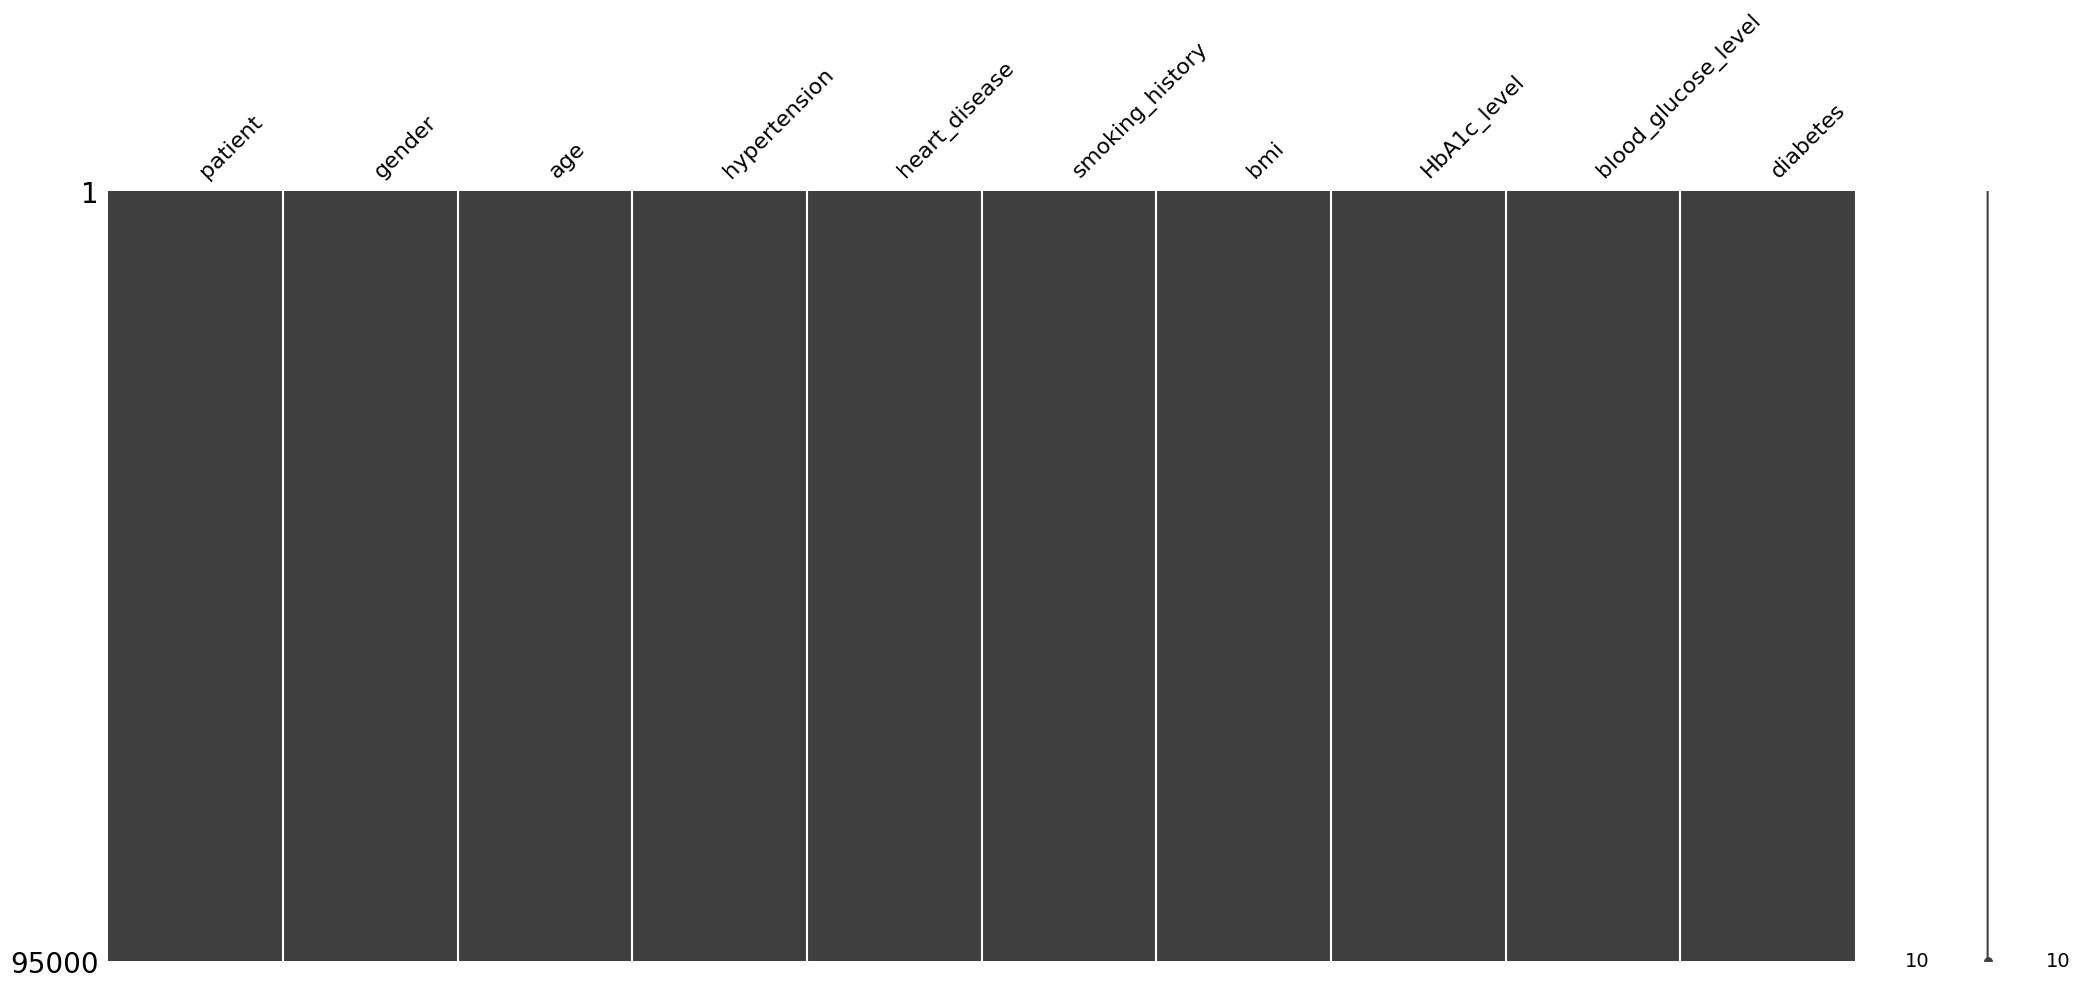

In [3]:
import missingno as msno
msno.matrix(train_df.copy())

In [4]:
cols_graf=['gender', 'age', 'hypertension', 'heart_disease','smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']

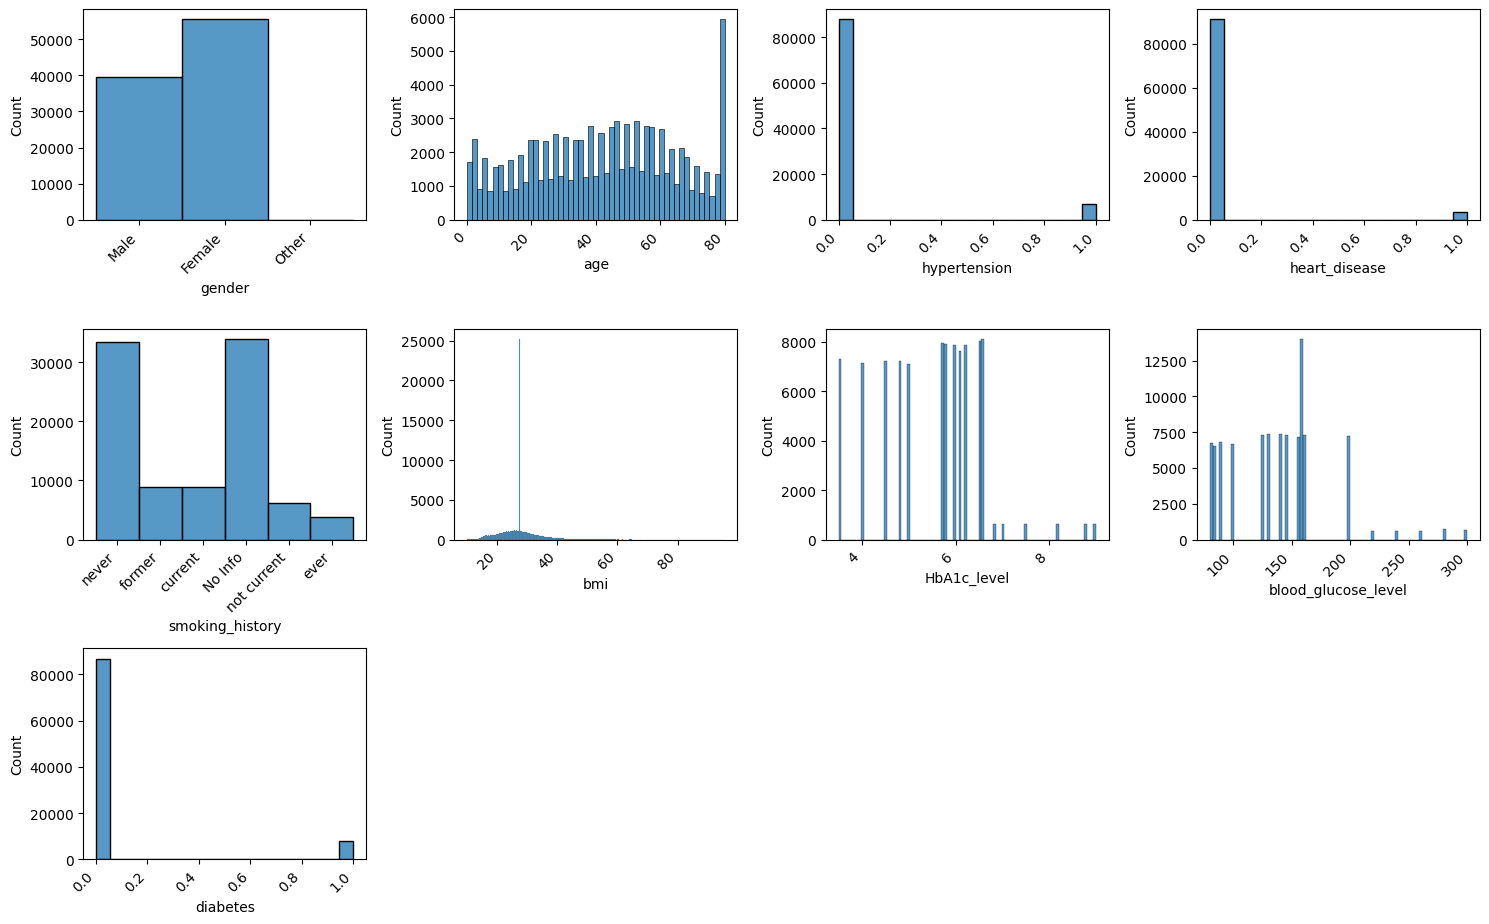

In [5]:
import seaborn as sns

plt.figure(figsize=(15, 12), dpi=100)

for i, columna in enumerate(cols_graf, start=1):
    plt.subplot(4, 4, i)
    sns.histplot(data=train_df, x=columna)
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')


# **Observaciones**

---
* Existen 3 géneros en el dataset, existen más de 10.000 mujeres que hombres y muy pocos categorizados como otros.
* Vemos que hay gran concentración de datos en la edad, cercana a los 80 años
* En el datasse existen desbalanceos entre personas con hipertensión, problemas de corazon y diabetes



In [6]:
cols_graf_new = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [7]:
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=len(cols_graf_new), cols=1, subplot_titles=[f'{col} vs diabetes' for col in cols_graf_new])

for i, column in enumerate(cols_graf_new):
    df_grouped = train_df.groupby([column, 'diabetes']).size().reset_index(name='counts')
    scatter = px.scatter(df_grouped, x=column, y='diabetes', size='counts', title=f'{column} vs diabetes')
    for trace in scatter.data:
        fig.add_trace(trace, row=i+1, col=1)

# # Actualizar el layout de la figura
fig.update_layout(height=1000, width=1200, showlegend=False)
fig.update_yaxes(tickvals=[0, 1], title='diabetes')

fig.show()


# **OBSERVACIONES**

---
* 'HbA1c_level': Observamos que las personas con diabetes, poseen más de 5.7 de hemoglobina glucosilada (HbA1c) que refleja los niveles de glucosa en sangre
* 'blood_glucose_level': Al igual que HbA1c_level, es importante los niveles de glucosa en sangre  para el diagnóstico de la diabetes, observamos que las personas con diabetenes poseen más de 126


In [8]:
cols_graf_vio=[ 'age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# **General**

---

In [32]:
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=4, subplot_titles=[f'{col}' for col in cols_graf_vio])

for i, column in enumerate(cols_graf_vio):
    box = go.Box(x=train_df[column], name=column)
    fig.add_trace(box, row=1, col=i+1)

fig.update_layout(height=400, width=2000, title_text="Box Plots Con Diabetes")

fig.show()

In [33]:
con_diabetes=train_df.copy()
con_diabetes=con_diabetes[con_diabetes['diabetes']==1]

sin_diabetes=train_df.copy()
sin_diabetes=sin_diabetes[sin_diabetes['diabetes']==0]

# **Con Diabetes**

---



In [10]:
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=4, subplot_titles=[f'{col}' for col in cols_graf_vio])

for i, column in enumerate(cols_graf_vio):
    box = go.Box(x=con_diabetes[column], name=column)
    fig.add_trace(box, row=1, col=i+1)

fig.update_layout(height=400, width=2000, title_text="Box Plots Con Diabetes")

fig.show()

# **Sin Diabetes**

---

In [11]:
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=4, subplot_titles=[f'{col}' for col in cols_graf_vio])

for i, column in enumerate(cols_graf_vio):
    box = go.Box(x=sin_diabetes[column], name=column)
    fig.add_trace(box, row=1, col=i+1)

fig.update_layout(height=400, width=2000, title_text="Box Plots Sin Diabetes")

fig.show()

# **OBSERVACIONES**

---
A simple vista, no se observan tantos valores atípicos o dispersionaes de los datos de las variables analizadas. La variable índice de masa corporal (bmi) es la que mayor variabilidad se observa de los valores.


# **ANALIZAMOS EL GÉNERO**

In [12]:
# Calcular las cuentas por género y diabetes
gender_diabetes_counts = train_df.copy().groupby(['gender', 'diabetes']).size().unstack(fill_value=0)
gender_totals = gender_diabetes_counts.sum(axis=1).sort_values()
gender_diabetes_counts = gender_diabetes_counts.loc[gender_totals.index]
gender_diabetes_counts

diabetes      0     1
gender               
Other        16     0
Male      35572  3849
Female    51330  4233

In [13]:
# Calcula el total por género
gender_totals = gender_diabetes_counts.sum(axis=1)
percentages = gender_diabetes_counts.div(gender_totals, axis=0) * 100
print(percentages)

diabetes           0         1
gender                        
Other     100.000000  0.000000
Male       90.236169  9.763831
Female     92.381621  7.618379


In [14]:
fig = px.bar(gender_diabetes_counts.reset_index(), x='gender', y=[0, 1], title='Distribución de Diabetes por Género', labels={'value': 'Número de Pacientes', 'gender': 'Género', 'variable': 'Diabetes'}, text_auto=True)
fig.update_layout(xaxis_title='Género', yaxis_title='Número de Pacientes', legend_title_text='Diabetes', barmode='stack')
fig.show()

# **ANALIZAMOS LOS FUMADORES**

In [15]:
# Calcular las cuentas por historial de tabaquismo y diabetes
smoke_diabetes_counts = train_df.copy().groupby(['smoking_history', 'diabetes']).size().unstack(fill_value=0)
smoke_totals = smoke_diabetes_counts.sum(axis=1).sort_values()
smoke_diabetes_counts = smoke_diabetes_counts.loc[smoke_totals.index]
smoke_diabetes_counts

diabetes             0     1
smoking_history             
ever              3349   443
not current       5478   651
current           7922   899
former            7388  1523
never            30210  3179
No Info          32571  1387

In [16]:
# Calcula el total por fumadores
smoke_totals = smoke_diabetes_counts.sum(axis=1)
percentages = smoke_diabetes_counts.div(smoke_totals, axis=0) * 100
print(percentages)

diabetes                 0          1
smoking_history                      
ever             88.317511  11.682489
not current      89.378365  10.621635
current          89.808412  10.191588
former           82.908764  17.091236
never            90.478900   9.521100
No Info          95.915543   4.084457


In [17]:
# Crear la gráfica
fig = px.bar(smoke_diabetes_counts.reset_index(), x='smoking_history', y=[0, 1], title='Distribución de Diabetes por Historial de Tabaquismo', labels={'value': 'Número de Pacientes', 'smoking_history': 'Historial de Tabaquismo', 'variable': 'Diabetes'}, text_auto=True)
fig.update_layout(xaxis_title='Historial de Tabaquismo', yaxis_title='Número de Pacientes', legend_title_text='Diabetes', barmode='stack')
fig.show()

# **BALANCEO/DESBALANCEO**

---



In [37]:
df_bal=train_df.copy()

attendance_counts = df_bal['diabetes'].value_counts().reset_index()
attendance_counts.columns = ['diabetes', 'count']

fig = px.bar(attendance_counts, x='diabetes', y='count', text='count', title='diabetes')
fig.update_traces(textposition='auto')

fig.show()

In [38]:
attendance_counts
total_count = attendance_counts['count'].sum()
attendance_counts['Porcentaje'] = (attendance_counts['count'] / total_count) * 100
attendance_counts['Porcentaje'] = attendance_counts['Porcentaje'].apply(lambda x: f"{x:.2f}%")
attendance_counts

diabetes  count Porcentaje
0         0  86918     91.49%
1         1   8082      8.51%

# **PREPROCESAMIENTO**

---



# **Primero hacemos las transformaciones necesarias al dataset que tenemos como base**

---



In [18]:
print(train_df.copy().copy()["gender"].drop_duplicates().to_list())
print(train_df.copy().copy()["smoking_history"].drop_duplicates().to_list())

label_cols = ["gender", "smoking_history"]
for col in label_cols:
    train_df.copy()[col] = train_df.copy()[col].astype(str)

train_df.copy().head(2)

['Male', 'Female', 'Other']
['never', 'former', 'current', 'No Info', 'not current', 'ever']


patient  gender   age  hypertension  heart_disease smoking_history    bmi  \
0    20432    Male   4.0             0              0           never  19.28   
1    49682  Female  50.0             0              0          former  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          3.5                  155         0  
1          5.7                  159         0

In [19]:
df_base = pd.get_dummies(train_df.copy(), columns=['gender', 'smoking_history'], prefix=['gender', 'smoking'])
df_base = df_base.astype(int)
df_base.head(5)

patient  age  hypertension  heart_disease  bmi  HbA1c_level  \
0    20432    4             0              0   19            3   
1    49682   50             0              0   27            5   
2    73886   43             0              0   21            4   
3    53144   64             0              0   28            6   
4    98507   10             0              0   15            6   

   blood_glucose_level  diabetes  gender_Female  gender_Male  gender_Other  \
0                  155         0              0            1             0   
1                  159         0              1            0             0   
2                  145         0              1            0             0   
3                  130         0              0            1             0   
4                  140         0              0            1             0   

   smoking_No Info  smoking_current  smoking_ever  smoking_former  \
0                0                0             0               0   
1                0                0             0               1   
2                0                0             0               0   
3                0                1             0               0   
4                1                0             0               0   

   smoking_never  smoking_not current  
0              1                    0  
1              0                    0  
2              1                    0  
3              0                    0  
4              0                    0

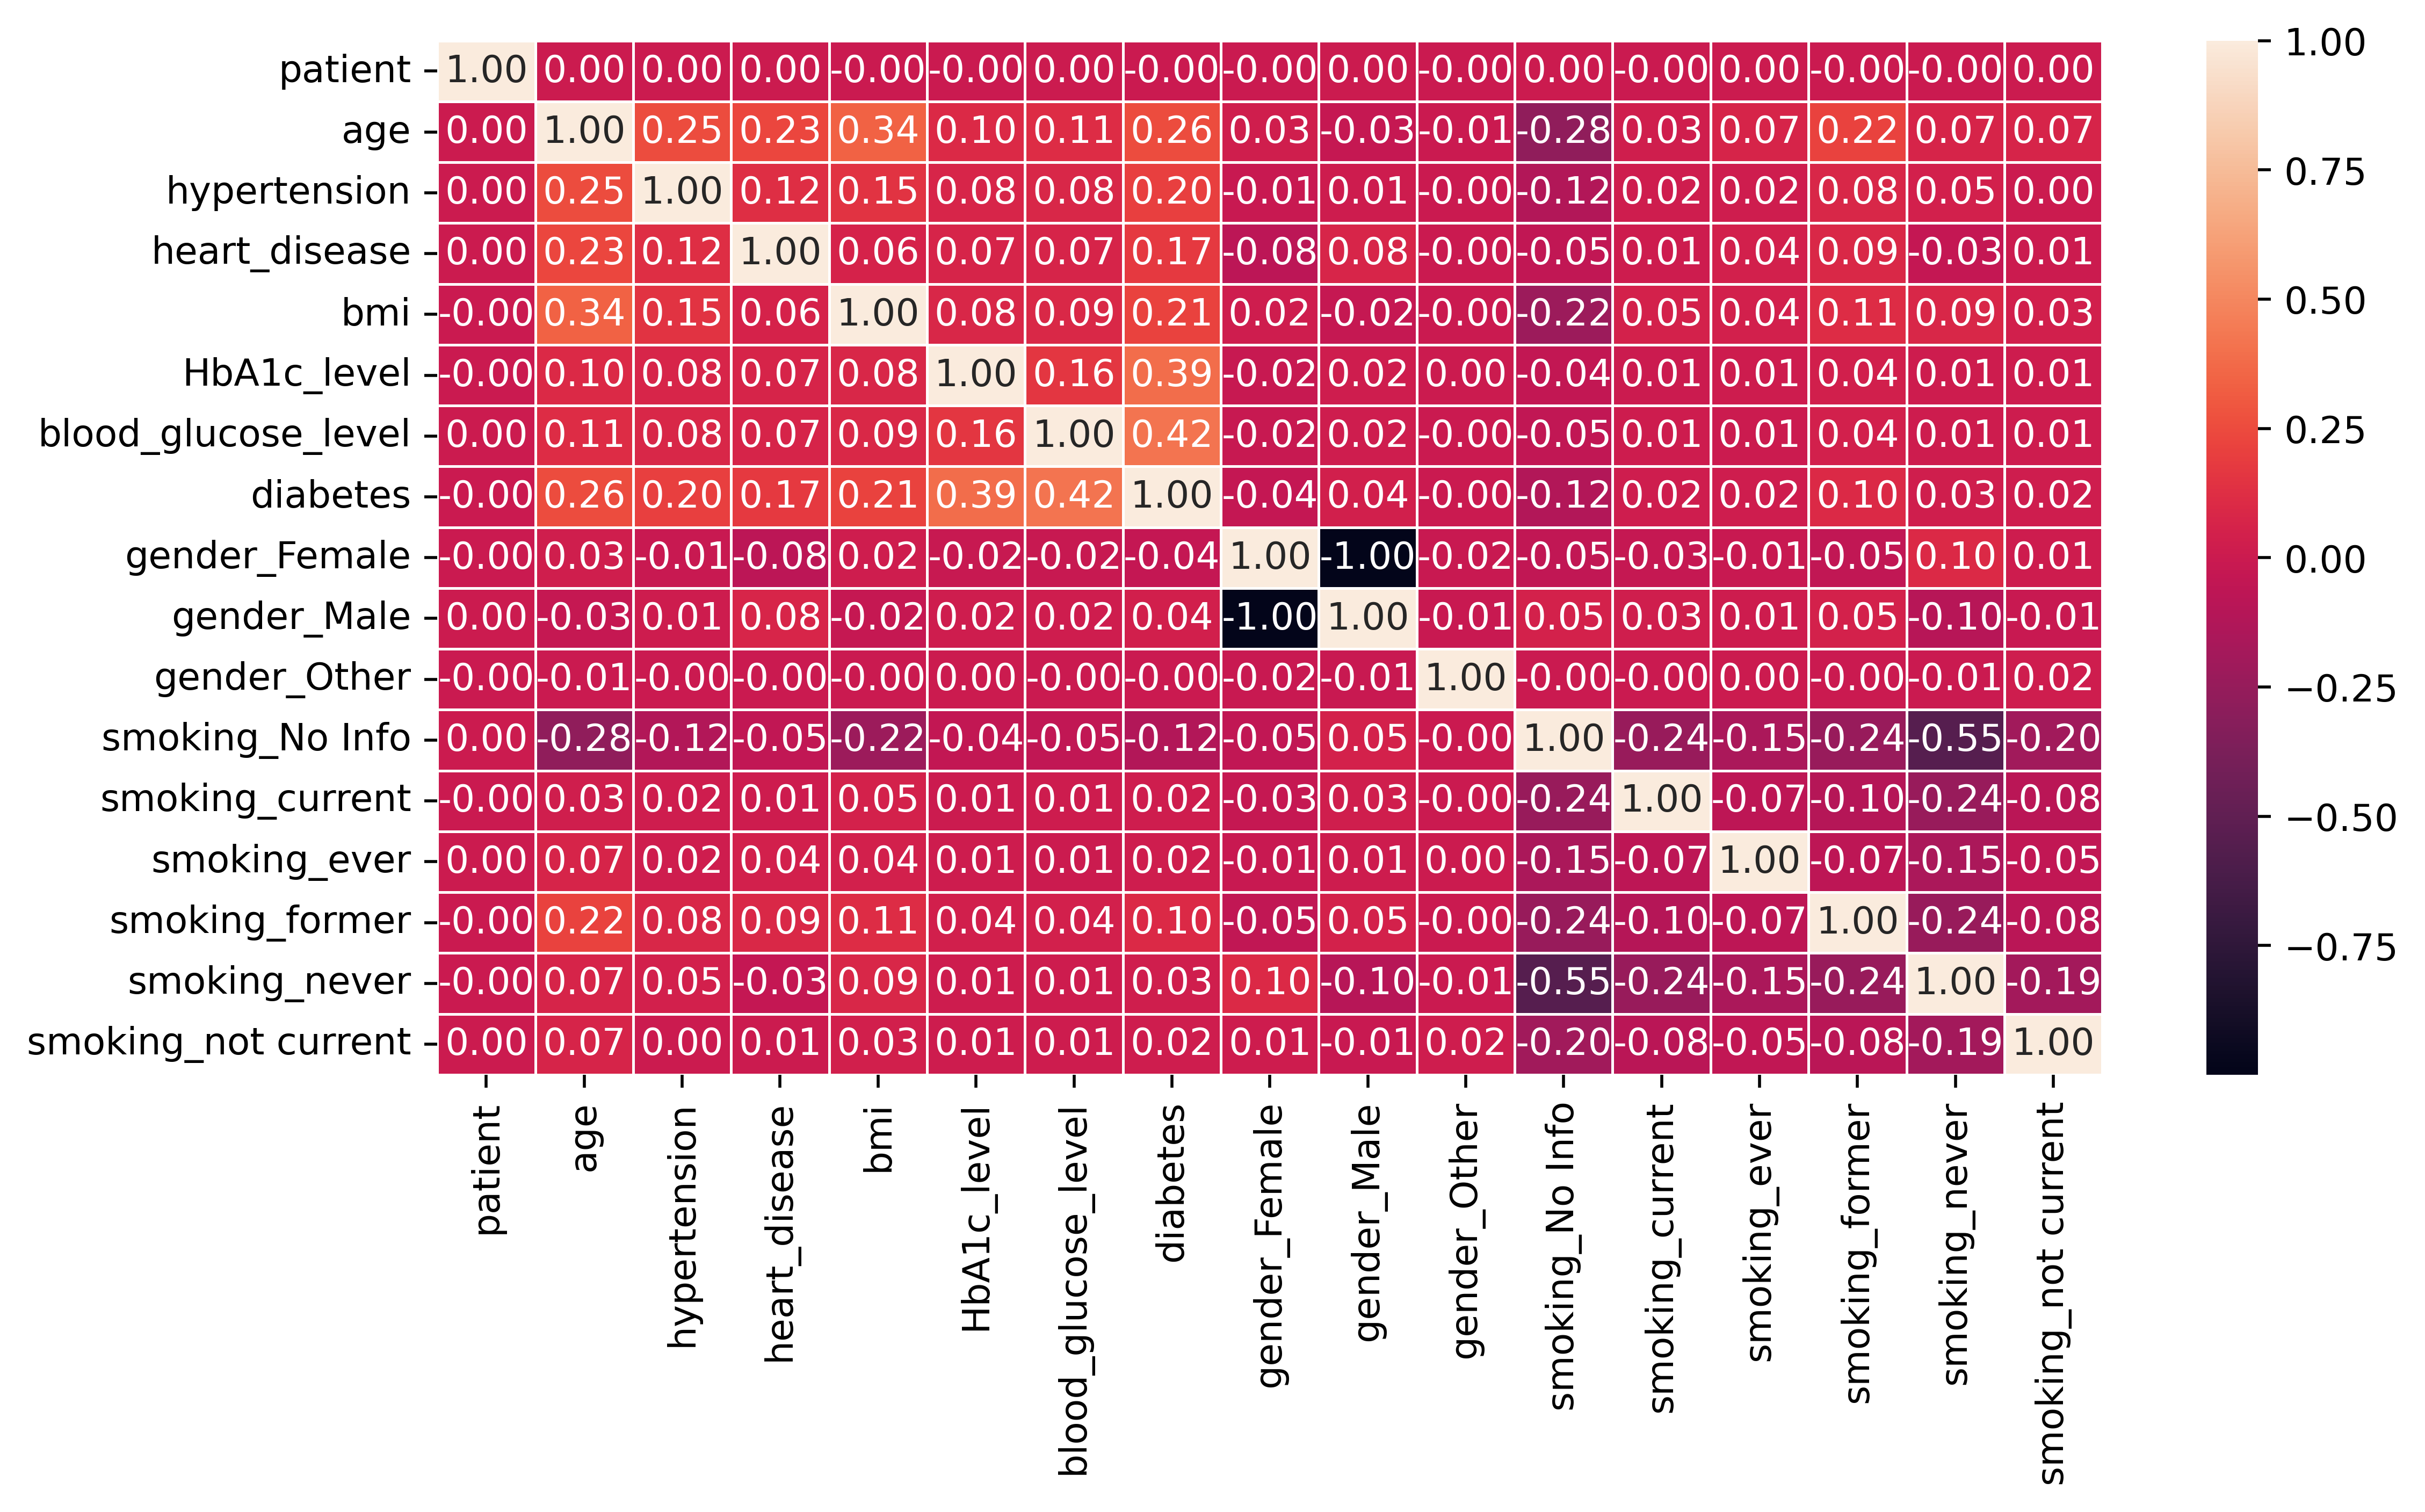

In [36]:
plt.figure(figsize=(10,5), dpi =500)
corr = df_base.corr(method = 'pearson')
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [55]:
y = df_base.diabetes
X = df_base.drop('diabetes',axis=1)

In [56]:
x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X.head(3)

patient       age  hypertension  heart_disease       bmi  HbA1c_level  \
0 -1.024813 -1.683068     -0.284899      -0.202693 -1.187493    -1.936886   
1 -0.011587  0.358356     -0.284899      -0.202693  0.018894    -0.120207   
2  0.826844  0.047704     -0.284899      -0.202693 -0.885896    -1.028546   

   blood_glucose_level  gender_Female  gender_Male  gender_Other  \
0             0.415552      -1.186973     1.187385     -0.012979   
1             0.513736       0.842479    -0.842187     -0.012979   
2             0.170091       0.842479    -0.842187     -0.012979   

   smoking_No Info  smoking_current  smoking_ever  smoking_former  \
0        -0.745859        -0.319932       -0.2039       -0.321728   
1        -0.745859        -0.319932       -0.2039        3.108212   
2        -0.745859        -0.319932       -0.2039       -0.321728   

   smoking_never  smoking_not current  
0       1.358399            -0.262612  
1      -0.736161            -0.262612  
2       1.358399            -0.262612

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

In [58]:
# Crear una función para evaluar los modelos
def evaluar_modelo(modelo, x_train, y_train, x_test, y_test):
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)
    y_prob = modelo.predict_proba(x_test)[:, 1]

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Mostrar las métricas
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'AUC: {auc:.4f}')
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\nClassification Report:\n', classification_report(y_test, y_pred))


# Lista de modelos a evaluar
modelos = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    # 'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluar cada modelo
for nombre, modelo in modelos.items():
    print(f'\nEvaluando {nombre}...')
    evaluar_modelo(modelo, x_train, y_train, x_test, y_test)



Evaluando Logistic Regression...
Accuracy: 0.9586
Precision: 0.8680
Recall: 0.6154
F1 Score: 0.7202
AUC: 0.9579

Confusion Matrix:
 [[17200   154]
 [  633  1013]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17354
           1       0.87      0.62      0.72      1646

    accuracy                           0.96     19000
   macro avg       0.92      0.80      0.85     19000
weighted avg       0.96      0.96      0.96     19000


Evaluando K-Nearest Neighbors...
Accuracy: 0.9594
Precision: 0.8875
Recall: 0.6087
F1 Score: 0.7222
AUC: 0.8916

Confusion Matrix:
 [[17227   127]
 [  644  1002]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17354
           1       0.89      0.61      0.72      1646

    accuracy                           0.96     19000
   macro avg       0.93      0.80      0.85     19000
weighted avg       0.96

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Definir la rejilla de parámetros para GradientBoostingClassifier
param_grid = {
    'n_estimators': [100, 200, 300],          # Reducir la cantidad de valores pero abarcar un rango razonable
    'learning_rate': [0.01, 0.05, 0.1],       # Añadir valores pequeños
    'max_depth': [3, 4, 5],                   # Añadir un par de opciones más para la profundidad máxima
    'min_samples_split': [2, 5, 10],          # Añadir algunas opciones para el número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]             # Añadir algunas opciones para el número mínimo de muestras en una hoja
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

# Imprimir los mejores parámetros
print('Mejores hiperparámetros:', best_params)

# Evaluar el mejor modelo encontrado por GridSearchCV
mejor_modelo = grid_search.best_estimator_

# Función para evaluar el modelo
def evaluar_modelo(modelo, x_train, y_train, x_test, y_test):
    # Predicciones
    y_train_pred = modelo.predict(x_train)
    y_test_pred = modelo.predict(x_test)

    # Evaluar precisión
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Imprimir resultados
    print('Precisión en entrenamiento:', train_accuracy)
    print('Precisión en prueba:', test_accuracy)
    print('Reporte de clasificación en prueba:\n', classification_report(y_test, y_test_pred))

# Evaluar el mejor modelo
evaluar_modelo(mejor_modelo, x_train, y_train, x_test, y_test)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mejores hiperparámetros: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Precisión en entrenamiento: 0.9680657894736842
Precisión en prueba: 0.969
Reporte de clasificación en prueba:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17354
           1       0.98      0.66      0.79      1646

    accuracy                           0.97     19000
   macro avg       0.97      0.83      0.88     19000
weighted avg       0.97      0.97      0.97     19000



# **Probamos con modelos balanceados**

---



In [44]:
pip install imbalanced-learn

In [54]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definir y ajustar el clasificador
bbc = BalancedBaggingClassifier(
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

bbc.fit(x_train, y_train)

# Realizar predicciones
y_pred = bbc.predict(x_test)
y_prob = bbc.predict_proba(x_test)[:, 1]

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Mostrar las métricas
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.9213
Precision: 0.5293
Recall: 0.8275
F1 Score: 0.6457
AUC: 0.9616

Confusion Matrix:
 [[16143  1211]
 [  284  1362]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96     17354
           1       0.53      0.83      0.65      1646

    accuracy                           0.92     19000
   macro avg       0.76      0.88      0.80     19000
weighted avg       0.94      0.92      0.93     19000



# **Probamos con modelos de UNDERSAMPLING (ELIMINA DATA)**

---


In [ ]:
pip install imbalanced-learn

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definir la técnica de submuestreo
us = NearMiss(sampling_strategy=0.5, n_neighbors=3, version=2, random_state=1)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

# Mostrar la distribución antes y después del submuestreo
print("Distribution before resampling {}".format(Counter(y_train)))
print("Distribution after resampling {}".format(Counter(y_train_res)))

# Definir y ajustar el modelo (aquí uso un DecisionTreeClassifier como ejemplo)
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_res, y_train_res)

# Realizar predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Mostrar los resultados
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')


# **Probamos con modelos de OVERSAMPLING (CREA DATA)**

---

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definir la técnica de sobremuestreo
os = RandomOverSampler(sampling_strategy=0.5)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

# Mostrar la distribución antes y después del sobremuestreo
print("Distribution before resampling {}".format(Counter(y_train)))
print("Distribution labels after resampling {}".format(Counter(y_train_res)))

# Definir y ajustar el modelo (aquí uso un DecisionTreeClassifier como ejemplo)
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_res, y_train_res)

# Realizar predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Mostrar los resultados
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')


In [25]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.model_selection import train_test_split

In [26]:
# model = Sequential()
# model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [27]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

In [29]:
# loss, accuracy = model.evaluate(x_test, y_test)
# print(f'Loss: {loss}, Accuracy: {accuracy}')
